In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams ['figure.dpi'] = 150

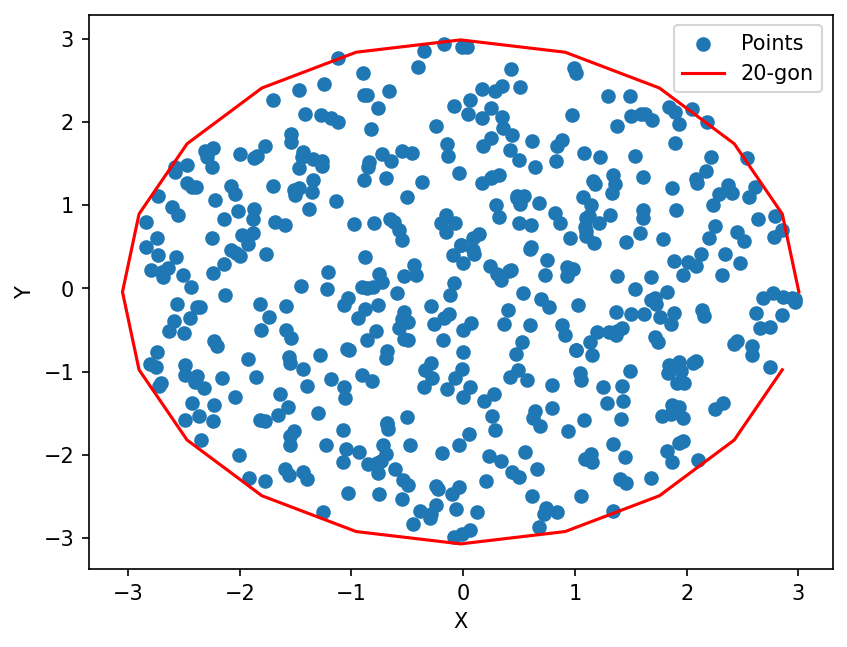

In [11]:
def plot_ngon(points, n):
    """
    Plot an n-gon around a 2D scatter plot of points.

    Parameters:
    -----------
    points : numpy.ndarray
        Shape (N, 2) array of (x, y) coordinates of the points.
    n : int
        Number of vertices for the n-gon.
    """
    # Calculate the center of the points
    center_x, center_y = np.mean(points, axis=0)

    # Calculate angles for the n-gon vertices
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)

    # Calculate the coordinates of the vertices
    x_vertices = center_x + np.cos(angles) * np.max(np.linalg.norm(points - [center_x, center_y], axis=1))
    y_vertices = center_y + np.sin(angles) * np.max(np.linalg.norm(points - [center_x, center_y], axis=1))

    # Plot the scatter plot of points
    plt.scatter(points[:, 0], points[:, 1], label='Points')

    # Plot the n-gon
    plt.plot(x_vertices, y_vertices, 'r-', label=f'{n}-gon')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

def distribute_points_in_disk(n, radius):
    """
    Distribute n points evenly in a disk.

    Parameters:
    -----------
    n : int
        Number of points.
    radius : float
        Radius of the disk.

    Returns:
    --------
    points : numpy.ndarray
        Shape (n, 2) array of (x, y) coordinates of the points.
    """
    angles = 2 * np.pi * np.random.random(n)
    sqrt_r = np.sqrt(np.random.random(n))  # Square root of a random number [0, 1)

    x = radius * sqrt_r * np.cos(angles)
    y = radius * sqrt_r * np.sin(angles)
    points = np.column_stack((x, y))
    return points

# Example usage
n = 100  # Number of points
radius = 5  # Radius of the disk

# Distribute points in a disk
points = distribute_points_in_disk(n, radius)

# Example usage
points = distribute_points_in_disk(500,3)
n = 20  # Number of vertices for the n-gon
plot_ngon(points, n)

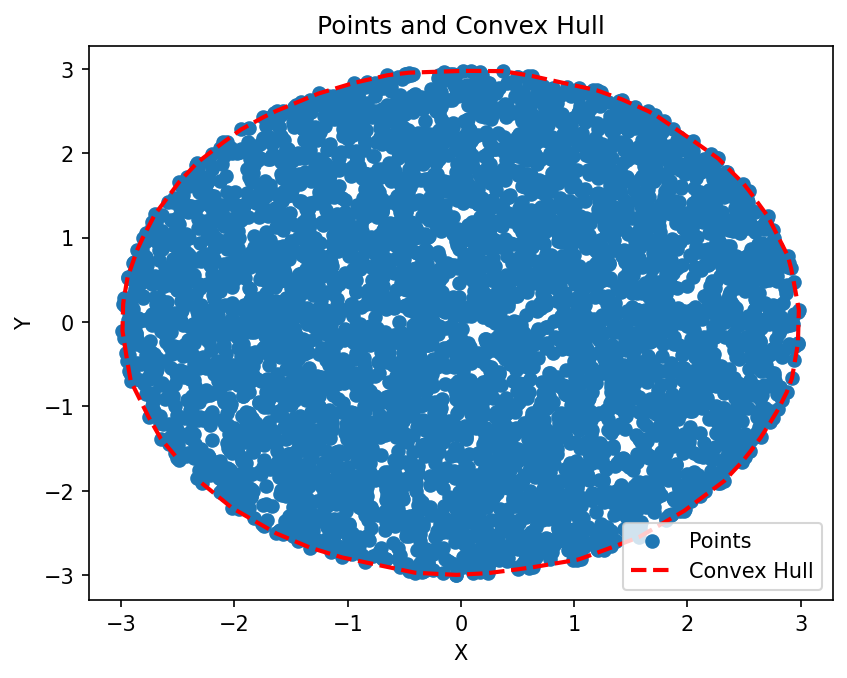

[4808 2687 1990  852  458 1935 4306 2269 1858 4659  445 4773 4181 3642
  862 4136 3030 3164 2621 1979  501  912 2419 4766 2124 2810 4207 4330
 2937 2162 4073 1907 2060 4200 3818 2602 2950 4592  714 1993 3189 4222
 1705 3080  683 4292 3336 1878 1520 3749 4246 1597 1560 3066 4219 2169
 3690 4804 4119 3782 2908 1639 4835 2846]


In [12]:
from scipy.spatial import ConvexHull
points = distribute_points_in_disk(5000,3)

hull = ConvexHull(points)

# Compute the convex hull
hull = ConvexHull(points)

# Plot the points
plt.scatter(points[:, 0], points[:, 1], label='Points')

# Plot the convex hull
plt.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'r--', lw=2, label='Convex Hull')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Points and Convex Hull')
plt.show()
print(hull.vertices)

In [13]:
def isInHull(P,hull):
    '''
    list of points P lies inside the hull
    :return: list
    List of boolean where true means that the point is inside the convex hull
    '''
    A = hull.equations[:,0:-1]
    print(A.shape)
    b = np.transpose(np.array([hull.equations[:,-1]]))
    print(b.shape)
    print(np.tile(-b,(1,len(P))).shape)
    isInHull = np.all((A @ np.transpose(P)) <= np.tile(-b,(1,len(P))),axis=0)
    return isInHull
isInHull([[0,2]],hull)

(64, 2)
(64, 1)
(64, 1)


array([ True])

NameError: name 'A' is not defined